In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('student-mat.csv', delimiter=';')

In [3]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

In [4]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
G3,0,0.0
schoolsup,0,0.0
sex,0,0.0
age,0,0.0
address,0,0.0


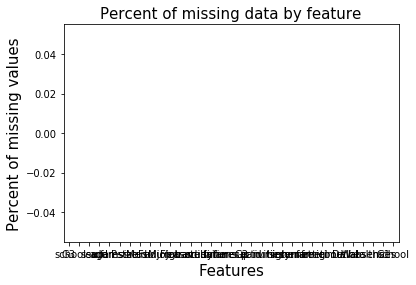

In [6]:
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent of missing data by feature', fontsize=15)
missing_data.head()

In [7]:
from scipy import stats

In [8]:
df_x = df.drop(['G3'], axis=1)
categorical_cols = list(df_x.select_dtypes(include=['object']))
numerical_cols = list(df_x.select_dtypes(exclude=['object']))

In [9]:
print(categorical_cols)
print(numerical_cols)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


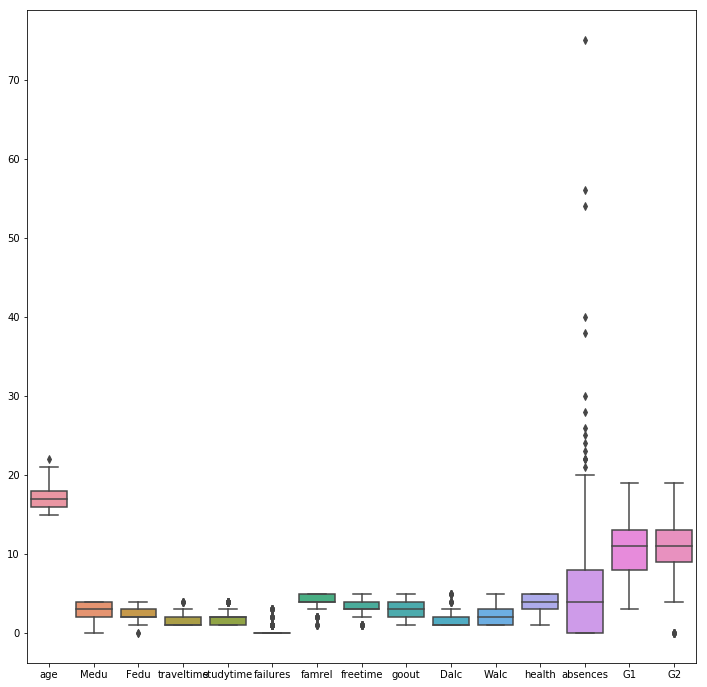

In [10]:
plt.figure(figsize=(12,12))
sns.boxplot(data=df[numerical_cols])

(2, 8)
(16,)


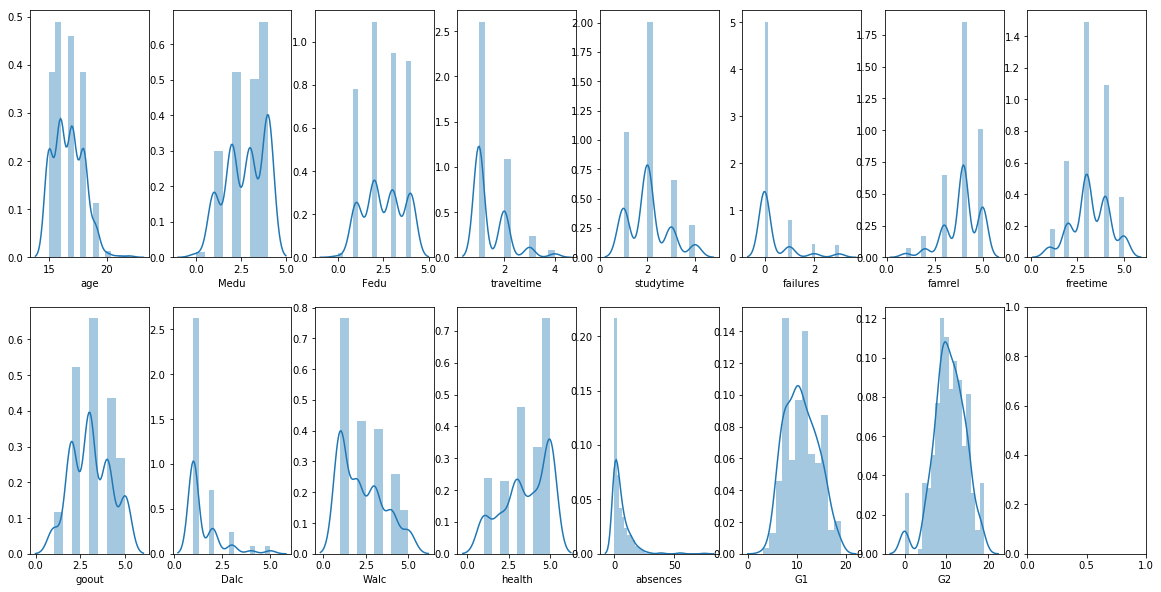

In [11]:
fig, axes = plt.subplots(ncols=8, nrows=2, figsize=(20,10))
print(axes.shape)
axes = axes.flatten()
print(axes.shape)
index = 0


for k,v in df[numerical_cols].items():
    sns.distplot(v, ax=axes[index])
    index += 1

In [12]:
df['G3'].head(3)

0     6
1     6
2    10
Name: G3, dtype: int64

In [13]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
    transformers=[("ohe", OneHotEncoder(), categorical_cols), ("scaler", RobustScaler(), numerical_cols)], remainder='passthrough')

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [15]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('trans', preprocessor), ('model', model)])

In [16]:
X = df.drop(["G3"], axis=1)
y = df["G3"]

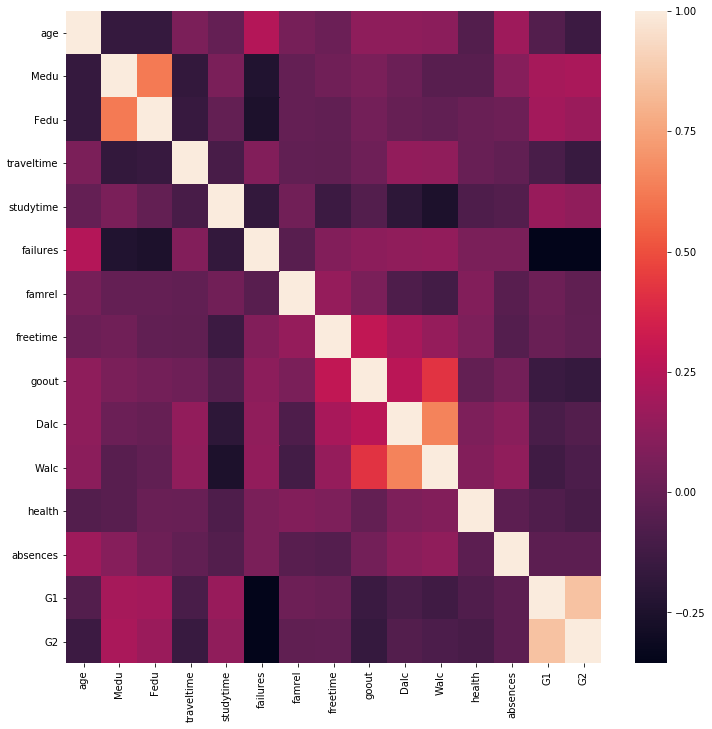

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

corr = X.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [18]:
print(X.shape)
print(y.shape)

(395, 32)
(395,)


In [19]:
df.shape

(395, 33)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
print(X_train.shape)
print(y_train.shape)

(276, 32)
(276,)


In [22]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('trans', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('ohe', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=Non...('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [23]:
print("linear regression score: %f" % pipeline.score(X_test, y_test))

linear regression score: 0.814196


In [24]:
y_pred = pipeline.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error

import numpy as np

np.sqrt(mean_squared_error(y_test, y_pred))

1.9890451496254464